In [ ]:
import numpy as np
import pylab as plb
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1D test

idea: take a list of points with initial position (height can vary, x-position is fixed) (and initial derivative?)
then iterate and determine new position from average of left derivative and right derivative

In [ ]:
#number of points
npoints = 10
xmax = 0.31
xmin = 0
deltax = xmax/npoints
#initialize x position and y position
xpos = linspace(xmin,xmax,npoints) #xposition stays fixed
ypos[0]=0
ypos[9]=0
ypos[1:9] = [0,0,0,0,0,0,0,0]#np.random.rand(npoints-2)

fixed = [1,0,0,0,0,0,0,0,0,1]
deriv = [-0.9,0,0,0,0,0,0,0,0,0.35]

NameError: name 'ypos' is not defined

In [ ]:
scatter(xpos,ypos)
xlim(-.01,0.32)
ylim(-1,1)

In [ ]:
#number of points
npoints = 10
xmax = 0.31
xmin = 0
deltax = xmax/npoints
# enter points that should stay fixed in sorted order
fixedx = [0,0.118112,0.307816,]
deriv = [-0.9,0,0.35,-0.57]
tempx = []
tempder = []
fixed = []
for i in range(len(fixedx)-1):
    tempx += list(linspace(fixedx[i],fixedx[i+1],num =50,endpoint = False))
    tempder += [deriv[i]]+[0 for k in range(49)]
    fixed += [1]+[0 for k in range(49)]
xpos = tempx + [fixedx[-1]]
xder = tempder + [deriv[-1]]
fixed +=[1]

In [ ]:
scatter(xpos,xder)

In [ ]:
tempder = xder
for k in range(1000):
    for i in [l for l in range(len(xpos)) if fixed[l]==0]:
        tempder[i] = (xder[i-1]+xder[i+1])/2
    xder[:] = tempder[:]
scatter(xpos,xder)

## integrate continuous derivative

In [ ]:
tempint = [(xder[i+1]+xder[i])/2*(xpos[i+1]-xpos[i]) for i in range(len(xpos)-1)]
xint = [tempint[0]]
for i in range(len(tempint)-1):
    xint += [xint[i]+tempint[i+1]]
scatter(xpos[:-1],xint)

# compare to 1D Reynolds model

In [ ]:
def fp(P):
    return 0.6*P*(1 - P/20.0) - 0.6*0.005*P/(0.002 + 0.01*P)

In [ ]:
ptest = linspace(0,19.49,500)
fptest = [fp(p) for p in ptest]

NameError: name 'xint' is not defined

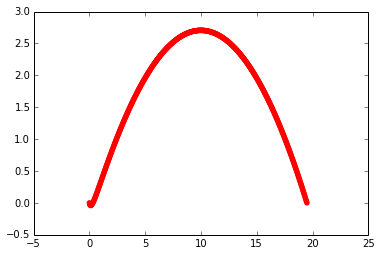

In [ ]:
scatter(ptest,fptest,color = "r")
scatter(xpos[:-1],xint)

## Try averaging of function value and add derivative close to the specified points.

In [ ]:
#number of points
npoints = 50
# enter points that should stay fixed in sorted order
fixedx = [0,0.118112,0.307816,9.99037,19.49]
fixedy = [0,-0.0409385,0,2.70589,0]
deriv = [-0.9,0,0.35,0,-0.57]

tempx = []
tempy = []
tempder = []
fixed = []
for i in range(len(fixedx)-1):
    tempx += list(linspace(fixedx[i],fixedx[i+1],num =npoints,endpoint = False))
    tempy += list(linspace(fixedy[i],fixedy[i+1],num =npoints,endpoint = False))
    tempder += [deriv[i]]+[0 for k in range(npoints-1)]
    fixed += [1]+[0 for k in range(npoints-1)]
xpos = tempx + [fixedx[-1]]
ypos = tempy + [fixedy[-1]]
xder = tempder + [deriv[-1]]
fixed +=[1]

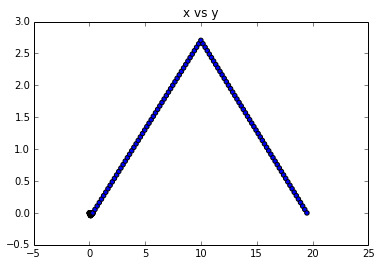

In [ ]:
scatter(xpos,ypos)
title("x vs y")

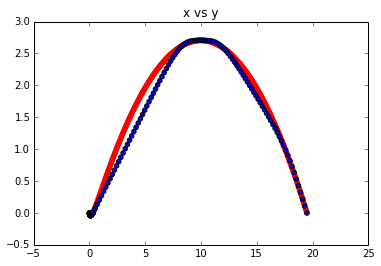

In [ ]:
tempy = ypos
lam = 0.0074
for k in range(1000):
    for i in [l for l in range(len(ypos)) if fixed[l]==0]:
        tempy[i] = (ypos[i-1]+ypos[i+1])/2*(1-exp(-abs(xpos[i] - 0.307816)/lam)- exp(-abs(xpos[i] - 0.118112)/lam)\
                                            -exp(-abs(xpos[i] - 0)/lam)-exp(-abs(xpos[i] - 9.99037)/0.5)
                                            -exp(-abs(xpos[i] - 19.49)/0.5))\
        +(0 - 0.9*(xpos[i] - 0))*exp(-abs(xpos[i] - 0)/lam)\
        + (-0.0409385 + 0*(xpos[i] - 0.118112))*exp(-abs(xpos[i] - 0.118112)/lam)\
        + (-0 + 0.35*(xpos[i] - 0.307816))*exp(-abs(xpos[i] - 0.307816)/lam)\
        + (2.70589 + 0*(xpos[i] - 9.99037))*exp(-abs(xpos[i] - 9.99037)/0.5)\
        + (0 + -0.57*(xpos[i] - 19.49))*exp(-abs(xpos[i] - 19.49)/0.5)
    ypos[:] = tempy[:]
    
scatter(ptest,fptest,color = "r") 
scatter(xpos,ypos)       
title("x vs y")    

(-0.05, 0.5)

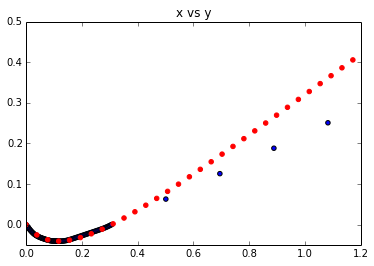

In [ ]:
scatter(xpos,ypos)    
scatter(ptest,fptest,color = "r")    
title("x vs y")    
xlim(0,1.2)
ylim(-0.05,0.5)

In [ ]:
ypos

[0.0,
 -0.0021256150064866272,
 -0.0042490934949433058,
 -0.0063659846058425557,
 -0.0084678336589406929,
 -0.010541634800552492,
 -0.012570439676739148,
 -0.014535066315711106,
 -0.016416439901712092,
 -0.018197929709929981,
 -0.019867142923060414,
 -0.021416887619150962,
 -0.022845286126188174,
 -0.024155212014098988,
 -0.025353309192287257,
 -0.026448847278194167,
 -0.027452610631019905,
 -0.028375944508386954,
 -0.029230014362972543,
 -0.030025284393656058,
 -0.030771190919871884,
 -0.031475971780715407,
 -0.032146609898524886,
 -0.032788852768645814,
 -0.033407276407066332,
 -0.034005369895732107,
 -0.034585623835071834,
 -0.035149612208571455,
 -0.035698062315049912,
 -0.036230911712139921,
 -0.036747354818560056,
 -0.037245885208392247,
 -0.037724342857439787,
 -0.038179978632821972,
 -0.038609550818800867,
 -0.039009469714754393,
 -0.039376005137675731,
 -0.039705566422870653,
 -0.039995053553943505,
 -0.040242260271244779,
 -0.04044628607329237,
 -0.040607887859348941,
 -0.040

In [ ]:
min(range(len(xpos)), key=lambda i: abs(xpos[i]-11.5))

253

In [ ]:
xpos[252:255]

[11.415314500000001, 11.534059875000001, 11.65280525]